In [320]:
import pandas as pd
import os
import numpy as np
data=pd.read_csv('/Users/kazba1/Downloads/with_distance_to_CBS.csv')
data=pd.DataFrame(data)
data=data[['links_Appartment_url','latitude','longitude','distance to CBS']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   links_Appartment_url  2658 non-null   object 
 1   latitude              2658 non-null   float64
 2   longitude             2658 non-null   float64
 3   distance to CBS       2658 non-null   float64
dtypes: float64(3), object(1)
memory usage: 83.2+ KB


In [321]:
df1=pd.read_csv('/Users/kazba1/Desktop/RE valuation modelling/Image urls/image_url.csv')
df1 = df1.rename(columns={'bolig_urls_link': 'links_Appartment_url','bolig_urls_image1': 'links_image1_url','bolig_urls_image2': 'links_image2_url','bolig_urls_image3': 'links_image3_url'})
df1=df1[['links_Appartment_url','links_image1_url','links_image2_url','links_image3_url']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   links_Appartment_url  2617 non-null   object
 1   links_image1_url      2617 non-null   object
 2   links_image2_url      2497 non-null   object
 3   links_image3_url      2470 non-null   object
dtypes: object(4)
memory usage: 81.9+ KB


In [322]:
df=pd.read_csv('/Users/kazba1/Downloads/Cleaned SO FAR.csv')
df=pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   links_Appartment_url              2545 non-null   object 
 1   links_Appartment_Name             2545 non-null   object 
 2   links_Appartment_Address          2545 non-null   object 
 3   links_Appartment_Boligtype        2545 non-null   object 
 4   links_Appartment_Rooms            2545 non-null   float64
 5   links_Appartment_Floor            2545 non-null   object 
 6   links_Appartment_Furnished        2545 non-null   object 
 7   links_Appartment_Shareable        2545 non-null   object 
 8   links_Appartment_Pets_allowed     2545 non-null   object 
 9   links_Appartment_Rent_period      2545 non-null   object 
 10  links_Appartment_Take_over_date   2545 non-null   object 
 11  links_Appartment_Rent_monthly     2545 non-null   int64  
 12  links_

### Merging data

In [323]:
merged = pd.merge(df, data,how="left", on=["links_Appartment_url"])
merged=merged[merged['latitude'].isnull()==False]
merged = pd.merge(merged, df1,how="left", on=["links_Appartment_url"])
merged=merged[merged['links_image1_url'].isnull()==False]
merged=merged.reset_index(drop=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   links_Appartment_url              2339 non-null   object 
 1   links_Appartment_Name             2339 non-null   object 
 2   links_Appartment_Address          2339 non-null   object 
 3   links_Appartment_Boligtype        2339 non-null   object 
 4   links_Appartment_Rooms            2339 non-null   float64
 5   links_Appartment_Floor            2339 non-null   object 
 6   links_Appartment_Furnished        2339 non-null   object 
 7   links_Appartment_Shareable        2339 non-null   object 
 8   links_Appartment_Pets_allowed     2339 non-null   object 
 9   links_Appartment_Rent_period      2339 non-null   object 
 10  links_Appartment_Take_over_date   2339 non-null   object 
 11  links_Appartment_Rent_monthly     2339 non-null   int64  
 12  links_

In [154]:
merged.to_csv('/Users/kazba1/Desktop/RE valuation modelling/merged.csv')

### Estimating the number of bedrooms

In [324]:
# Deleting entries wiht more than 10 rooms
merged=merged[merged['links_Appartment_Rooms']<10]
merged=merged.reset_index(drop=True)

In [325]:
#The bedrooms can be estimated with around 90% accuracy by subtracting one in apartments with two to four rooms and two with five and six
merged['links_Appartment_Rooms']=merged['links_Appartment_Rooms'].astype(int)
for i in range(len(merged.index)):
    if merged.loc[i,'links_Appartment_Rooms']>1 & merged.loc[i,'links_Appartment_Rooms']<5:
        merged.loc[i,'Bedrooms']=merged.loc[i,'links_Appartment_Rooms']-1
    if merged.loc[i,'links_Appartment_Rooms']>4:
        merged.loc[i,'Bedrooms']=merged.loc[i,'links_Appartment_Rooms']-2
    if merged.loc[i,'links_Appartment_Rooms']==1:
        merged.loc[i,'Bedrooms']=merged.loc[i,'links_Appartment_Rooms']

### Including price per bedroom calculations

In [326]:
# links_Appartment_Rooms to integers
merged['Bedrooms']=merged['Bedrooms'].astype(int)

# taking care of links_rent_aconto_monthly missing values by giving them the value of links_Appartment_Rent_monthly
a=merged[merged['links_rent_aconto_monthly'].isnull()].index
for i in range(len(a)):
    merged.loc[a[i],'links_rent_aconto_monthly']=merged.loc[a[i],'links_Appartment_Rent_monthly']

# calculate Price_per_room
# using apply function to create a new column 
merged['Price_per_bedroom'] = merged['links_rent_aconto_monthly']/merged['Bedrooms']
# Print the DataFrame after addition of new column 
merged = merged.fillna(0)
merged['Price_per_bedroom'] =merged['Price_per_bedroom'].astype(int)

In [341]:
# Deleting apartments that are more than 10k per bedroom
merged=merged[merged['Price_per_bedroom'] < 10000]
merged=merged.reset_index(drop=True)

#creating a new column with score rating/points
def rating_price(merged):
    if (merged['Price_per_bedroom'] < 3000):
        return 5
    elif (merged['Price_per_bedroom'] < 4000):
        return 4
    elif (merged['Price_per_bedroom'] < 5000):
        return 3
    elif (merged['Price_per_bedroom'] < 6000):
        return 2
    elif (merged['Price_per_bedroom'] < 7000):
        return 1
    elif (merged['Price_per_bedroom'] < 8000):
        return 0
    elif (merged['Price_per_bedroom'] > 8000):
        return np.nan
    
merged['Price_score'] = merged.apply(rating_price, axis = 1)
merged = merged.fillna(0)
merged['Price_score'] = merged['Price_score'].astype(int)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa9e97490>]],
      dtype=object)

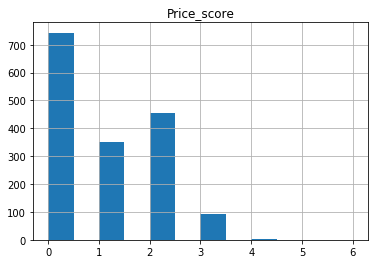

In [342]:
# histogram
%matplotlib inline 
#to plot charts into Jupyter Notebook
merged.hist('Price_score', bins=12, range=[0, 6])

### Distance score. Optional: Limiting the distance from CBS to 7km will remove around 25% of the data set

In [343]:
#cleaning up distance that is unrealisticly too far away:
merged=merged[merged['distance to CBS'] < 14]
merged=merged.reset_index(drop=True)

#creating a new column with score rating/points
def rating_price(merged):
    if (merged['distance to CBS'] < 1):
        return 5
    elif (merged['distance to CBS'] < 2):
        return 4
    elif (merged['distance to CBS'] < 3):
        return 3
    elif (merged['distance to CBS'] < 5):
        return 2
    elif (merged['distance to CBS'] < 8):
        return 1
    elif (merged['distance to CBS'] < 14):
        return 0
    elif (merged['distance to CBS'] > 14):
        return np.nan
    
merged['CBS_distance_score'] = merged.apply(rating_price, axis = 1)
merged = merged.fillna(0)
merged['CBS_distance_score'] = merged['CBS_distance_score'].astype(int)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaa9f81b90>]],
      dtype=object)

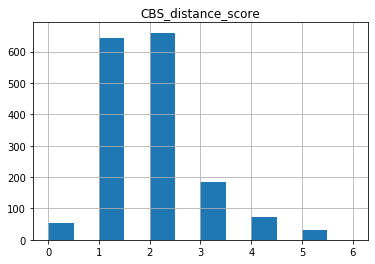

In [344]:
# histogram
%matplotlib inline 
#to plot charts into Jupyter Notebook
merged.hist('CBS_distance_score', bins=12, range=[0, 6])

### Saving data

In [346]:
merged.to_csv('/Users/kazba1/Desktop/RE valuation modelling/data_11_11_after_elimination.csv')

In [347]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   links_Appartment_url              1645 non-null   object 
 1   links_Appartment_Name             1645 non-null   object 
 2   links_Appartment_Address          1645 non-null   object 
 3   links_Appartment_Boligtype        1645 non-null   object 
 4   links_Appartment_Rooms            1645 non-null   int64  
 5   links_Appartment_Floor            1645 non-null   object 
 6   links_Appartment_Furnished        1645 non-null   object 
 7   links_Appartment_Shareable        1645 non-null   object 
 8   links_Appartment_Pets_allowed     1645 non-null   object 
 9   links_Appartment_Rent_period      1645 non-null   object 
 10  links_Appartment_Take_over_date   1645 non-null   object 
 11  links_Appartment_Rent_monthly     1645 non-null   int64  
 12  links_

### Optional: Beautifying the dataset

In [318]:
#renaming the collumns
merged = merged.rename(columns={'links_Appartment_url': 'Url','links_Appartment_Name': 'Name','links_Appartment_Address': 'Address','links_Appartment_Boligtype': 'Type','links_Appartment_Rooms': 'Room_number','links_Appartment_Floor': 'Floor_number','links_Appartment_url': 'Appartment_url','links_Appartment_Furnished': 'Furnished','links_Appartment_Shareable': 'Shareable','links_Appartment_Pets_allowed': 'Pets_allowed','links_Appartment_Rent_period': 'Rent_period','links_Appartment_Take_over_date': 'Take_over_date','links_Appartment_Rent_monthly': 'Rent_monthly','links_Appartment_Deposit': 'Deposit','links_Appartment_Occupancy_price': 'Occupancy_price','links_Appartment_Aconto': 'Aconto','links_Appartment_First_rent': 'First_rent','links_Appartment_Description': 'Description','links_Appartment_sqm': 'Size','links_rent_aconto_monthly': 'Rent_plus_aconto_monthly','distance to CBS': 'Distance_CBS','links_image1_url': 'image1_url','links_image2_url': 'image2_url','links_image3_url': 'image3_url','Bedrooms': 'Bedroom_number'})

